In [24]:

source("../../R/gen_data.R")
source("../../R/display.R")
source("../../R/metrics.R")
source("../../R/JGL.R")
source("../../R/admm.iters.R")
source("../../R/gete.R")
source("../../R/SSJGL.R")
source("../../R/eval.R")
library(ggplot2)
library(corrplot)
library(Matrix)
 #convert between network and igraph
library(BDgraph)
library(tmvtnorm)
library(binr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
##merge data
load("../../results/new_roc/roc_1/FGL20_scalefree_001.RData")
fgl_roc_1 <-fgl_roc
load("../../results/new_roc/roc_2/FGL20_scalefree_001.RData")
fgl_roc_2 <-fgl_roc

fgl_sum <-fgl_roc_1
for(i in 1:20){
    fgl_sum[[1]]$FPR[[i]] <- rbind(fgl_sum[[1]]$FPR[[i]],fgl_roc_2[[1]]$FPR[[i]])
    fgl_sum[[1]]$TPR[[i]] <- rbind(fgl_sum[[1]]$TPR[[i]],fgl_roc_2[[1]]$TPR[[i]])

}

##merge data
load("../../results/new_roc/roc_1/GGL20_scalefree_001.RData")
ggl_roc_1 <-ggl_roc
load("../../results/new_roc/roc_2/GGL20_scalefree_001.RData")
ggl_roc_2 <-ggl_roc

ggl_sum <-ggl_roc_1
for(i in 1:20){
    ggl_sum[[1]]$FPR[[i]] <- rbind(ggl_sum[[1]]$FPR[[i]],ggl_roc_2[[1]]$FPR[[i]])
    ggl_sum[[1]]$TPR[[i]] <- rbind(ggl_sum[[1]]$TPR[[i]],ggl_roc_2[[1]]$TPR[[i]])

}

##merge data
load("../../results/new_roc/roc_1/GL20_scalefree_001.RData")
gl_roc_1 <-gl_roc
load("../../results/new_roc/roc_2/GL20_scalefree_001.RData")
gl_roc_2 <-gl_roc

gl_sum <-gl_roc_1
for(i in 1:20){
    gl_sum[[1]]$FPR[[i]] <- rbind(gl_sum[[1]]$FPR[[i]],gl_roc_2[[1]]$FPR[[i]])
    gl_sum[[1]]$TPR[[i]] <- rbind(gl_sum[[1]]$TPR[[i]],gl_roc_2[[1]]$TPR[[i]])

}

In [54]:
load("../../results/roc_1/FGL20p100_scalefree_long_fused.RData")
load("../../results/roc_2/GGL20_scalefree_001.RData")
load("../../results/roc_2/GL20_scalefree_001.RData")
#load("../../results/scalefree_long2/ssjggl20_scalefree_long.RData")
replic_size <- length(fgl_roc[[1]]$FPR)
lam1_size   <- dim(fgl_roc[[1]]$FPR[[1]])[1]
lam2_size   <- dim(fgl_roc[[1]]$FPR[[1]])[2]
print(replic_size)
#replic_size <- length(fgl_roc[[1]]$FPR)
#lam1_size   <- dim(fgl_roc[[1]]$FPR[[1]])[1]
#lam2_size   <- dim(fgl_roc[[1]]$FPR[[1]])[2]
print(lam1_size)
print(lam2_size)

[1] 10
[1] 50
[1] 8


In [138]:
fgl_fpr <- fgl_roc[[1]]$FPR[[1]]
fgl_tpr <- fgl_roc[[1]]$TPR[[1]]

In [7]:
length(fgl_fpr)

[1] 480

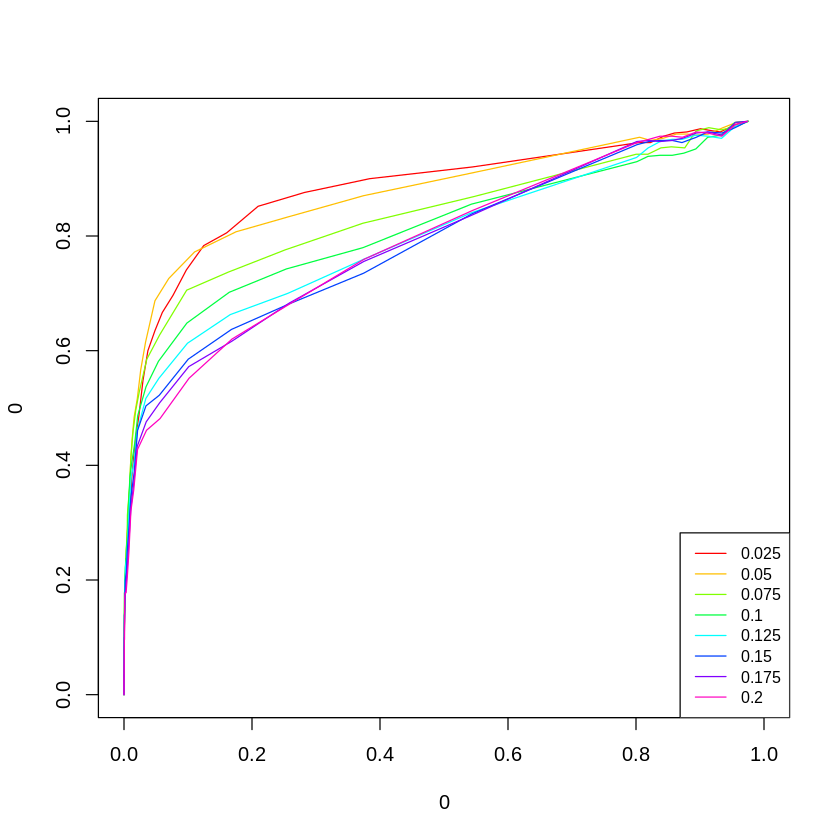

In [4]:
fgl_fpr <- fgl_sum[[1]]$FPR[[1]]
fgl_tpr <- fgl_sum[[1]]$TPR[[1]]
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")
cl <- rainbow(lam2_size)
for(l2 in 1:lam2_size){
    fpr_sort <- sort(fgl_fpr[,l2])
    tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]
    fpr_sort <- fpr_sort
    tpr_sort <- tpr_sort
    lines(fpr_sort, tpr_sort,type="l",col=cl[l2])
    
}

legend("bottomright", legend=c(0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2),
       col=c(cl), lty=1, cex=0.8)


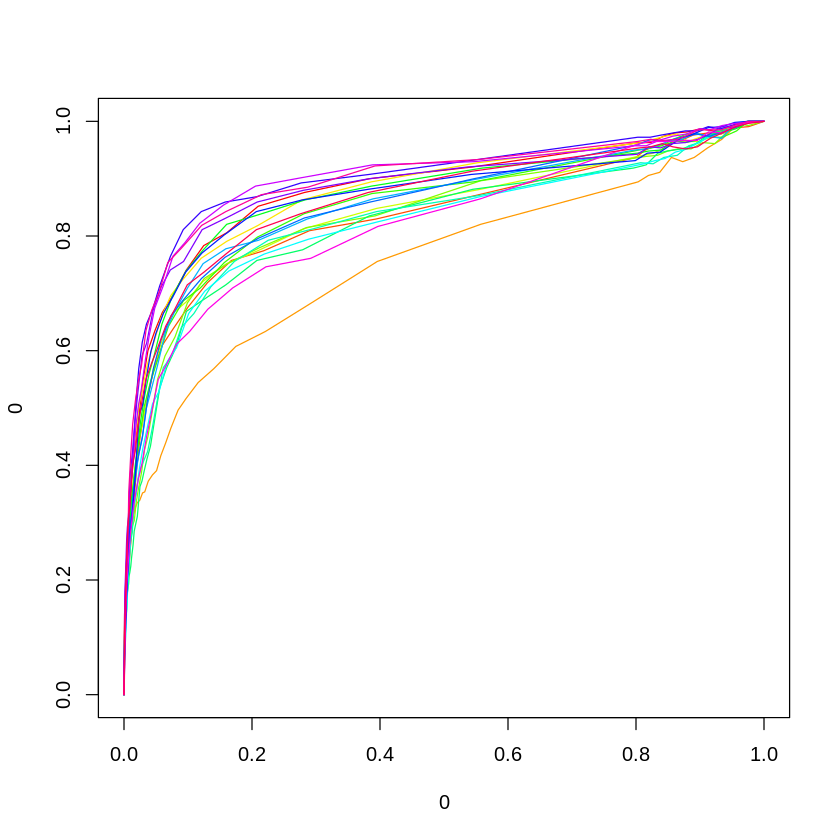

In [5]:
cl <- rainbow(replic_size)
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")
l2 <- 1
lam1_size <- 60
m_fpr <- matrix(NA,replic_size, lam1_size)
m_tpr <- matrix(NA,replic_size, lam1_size)
for(s in 1:replic_size){
    fgl_fpr <- fgl_sum[[1]]$FPR[[s]]
    fgl_tpr <- fgl_sum[[1]]$TPR[[s]]
    fpr_sort <- sort(fgl_fpr[,l2])
    tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]

    lines(c(0,fpr_sort,1), c(0,tpr_sort,1),type="l",col=cl[s])
    m_fpr[s,] <- fpr_sort
    m_tpr[s,] <- tpr_sort
}

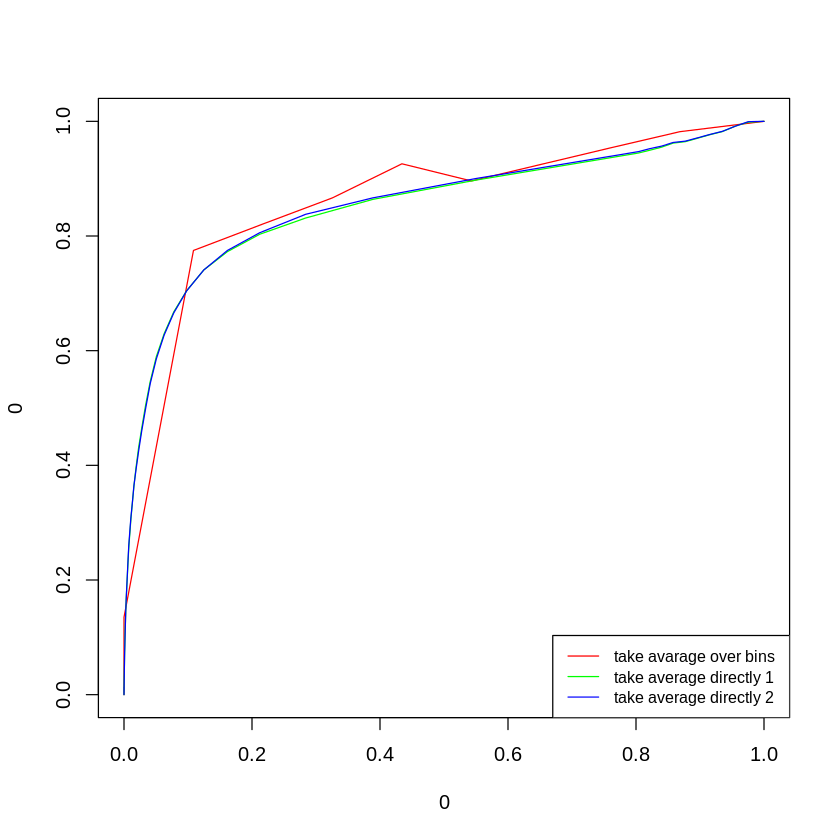

In [6]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")
cl <- rainbow(3)
#take average with bins 
s_fpr <- sort(m_fpr)
s_tpr <- m_tpr[order(m_fpr)]

bins_num <- 10
breaks <- seq(min(s_fpr),max(s_fpr), len=bins_num)
bins <- cut(s_fpr , breaks, include.lowest = T, right=FALSE)

b_fpr <- NULL
b_tpr <- NULL

for(i in 1:(bins_num-1)){
    if(summary(bins)[[i]]!=0){
        b_fpr <- c(b_fpr, breaks[i])
        b_tpr <- c(b_tpr, mean(s_tpr[which(findInterval(s_fpr, breaks)==i)],trim = 0.2))
    }
    
}
lines(c(0,b_fpr,1), c(0,b_tpr,1),type="l",col=cl[1])
#take average directly
d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
d_tpr2 <- apply(m_tpr, 2, mean, trim=0.2)
d_tpr1 <- colMeans(m_tpr, na.rm = FALSE, dims = 1)

lines(c(0,d_fpr,1), c(0,d_tpr1,1),type="l",col=cl[2])
lines(c(0,d_fpr,1), c(0,d_tpr2,1),type="l",col=cl[3])
legend("bottomright", legend=c("take avarage over bins","take average directly 1","take average directly 2"),
       col=c(cl), lty=1, cex=0.8)

tiff 
   3

png 
  2

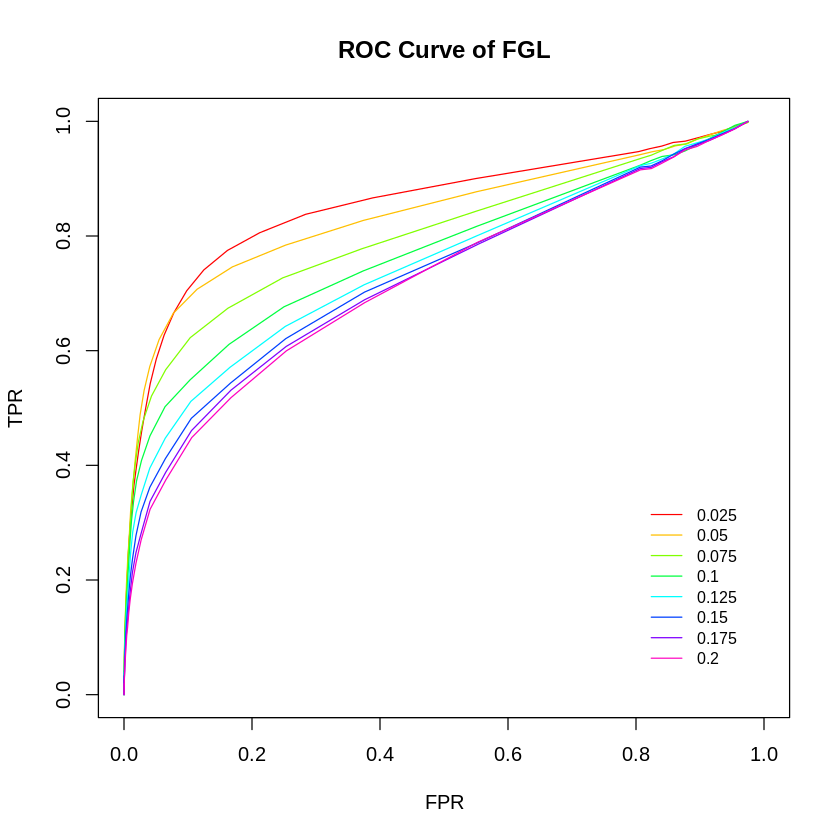

In [39]:

plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n",xlab="FPR", ylab="TPR")

cl <- rainbow(lam2_size)

for(l2 in 1:lam2_size){
    m_fpr <- matrix(NA,replic_size, lam1_size)
    m_tpr <- matrix(NA,replic_size, lam1_size)

    for(s in 1:replic_size){

        
        fgl_fpr <- fgl_sum[[1]]$FPR[[s]]
        fgl_tpr <- fgl_sum[[1]]$TPR[[s]]
        
        fpr_sort <- sort(fgl_fpr[,l2])
        tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]
        
        #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
        m_fpr[s,] <- fpr_sort
        m_tpr[s,] <- tpr_sort
        
    }
    d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
    d_tpr <- apply(m_tpr, 2, mean, trim=0.2)
    #colMeans(m_tpr, na.rm = FALSE, dims = 1)
    lines(d_fpr, d_tpr,type="l",col=cl[l2])
    #select the lam2 with largest area unterneath the ROC curve
    if(l2 == 1){
        #best_fgl_fpr <- c(0,d_fpr,1)
        #best_fgl_tpr <- c(0,d_tpr,1)
        best_fgl_fpr <- d_fpr
        best_fgl_tpr <- d_tpr
    }

}
title(main="ROC Curve of FGL") 
legend(0.8,0.35, legend=c(0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2),
       col=c(cl),box.lwd = 0, lty=1, cex=.8, lwd=1)
#lines(best_fgl_fpr, best_fgl_tpr,type="l")
dev.copy(tiff, file=paste("../../figures/scalefree_roc_fgl.tiff",sep=""),width = 5, height=5, res=600, units = "in", pointsize = 12)

dev.off()

tiff 
   3

png 
  2

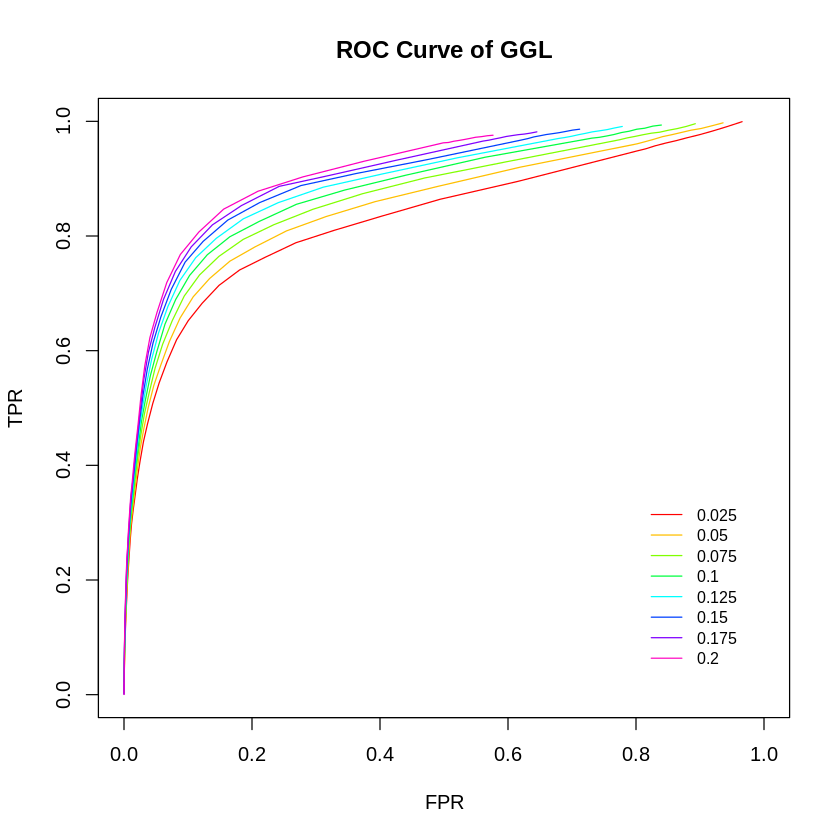

In [40]:

plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n",xlab="FPR", ylab="TPR")

cl <- rainbow(lam2_size)
#
for(l2 in 1:lam2_size){
    m_fpr <- matrix(NA,replic_size, lam1_size)
    m_tpr <- matrix(NA,replic_size, lam1_size)

    for(s in 1:replic_size){

        
        ggl_fpr <- ggl_sum[[1]]$FPR[[s]]
        ggl_tpr <- ggl_sum[[1]]$TPR[[s]]
        
        fpr_sort <- sort(ggl_fpr[,l2])
        tpr_sort <- ggl_tpr[,l2][order(ggl_fpr[,l2])]
        #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
        m_fpr[s,] <- fpr_sort
        m_tpr[s,] <- tpr_sort
        
    }
    
    d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
    d_tpr <- apply(m_tpr, 2, mean, trim=0.2)
    #colMeans(m_tpr, na.rm = FALSE, dims = 1)
    lines(d_fpr,d_tpr,type="l",col=cl[l2])
    #select the lam2 with largest area unterneath the ROC curve
    if(l2 == 8){
        best_ggl_fpr <- d_fpr
        best_ggl_tpr <- d_tpr
        #best_ggl_fpr <- d_fpr
        #best_ggl_tpr <- d_tpr 
    }
}
title(main="ROC Curve of GGL") 
legend(0.8,0.35, legend=c(0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2),
       col=c(cl),box.lwd = 0, lty=1, cex=0.8)
dev.copy(tiff, file=paste("../../figures/scalefree_roc_ggl.tiff",sep=""),width = 5, height=5, res=600, units = "in", pointsize = 12)
dev.off()
#lines(best_ggl_fpr, best_ggl_tpr,type="l")

In [23]:
ggsave()

ERROR: Error in ggsave(): could not find function "ggsave"


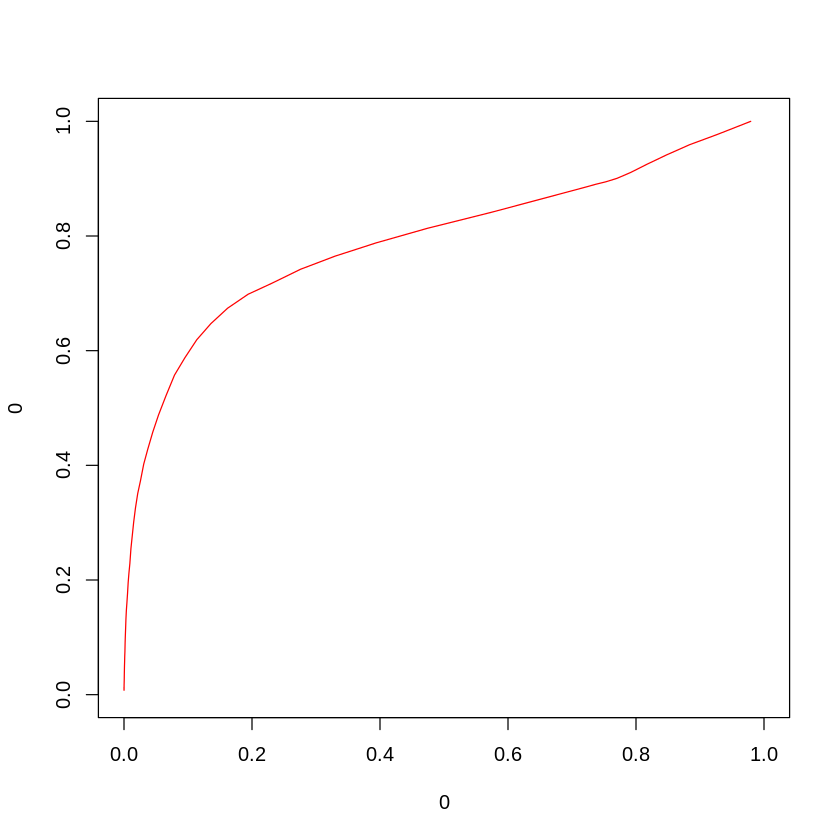

In [55]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")

cl <- rainbow(lam2_size)

m_fpr <- matrix(NA,replic_size, 60)
m_tpr <- matrix(NA,replic_size, 60)

for(s in 1:replic_size){


    gl_fpr <- gl_sum[[1]]$FPR[[s]]
    gl_tpr <- gl_sum[[1]]$TPR[[s]]

    fpr_sort <- sort(gl_fpr)
    tpr_sort <- gl_tpr[order(gl_fpr)]

    #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
    m_fpr[s,] <- fpr_sort
    m_tpr[s,] <- tpr_sort

    d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
    d_tpr <- apply(m_tpr, 2, mean, trim=0.2)
    #colMeans(m_tpr, na.rm = FALSE, dims = 1)
    lines(d_fpr, d_tpr,type="l",col=cl[1])
}

best_gl_fpr <- d_fpr
best_gl_tpr <- d_tpr



ERROR: Error in m_fpr[s, ] <- fpr_sort: number of items to replace is not a multiple of replacement length


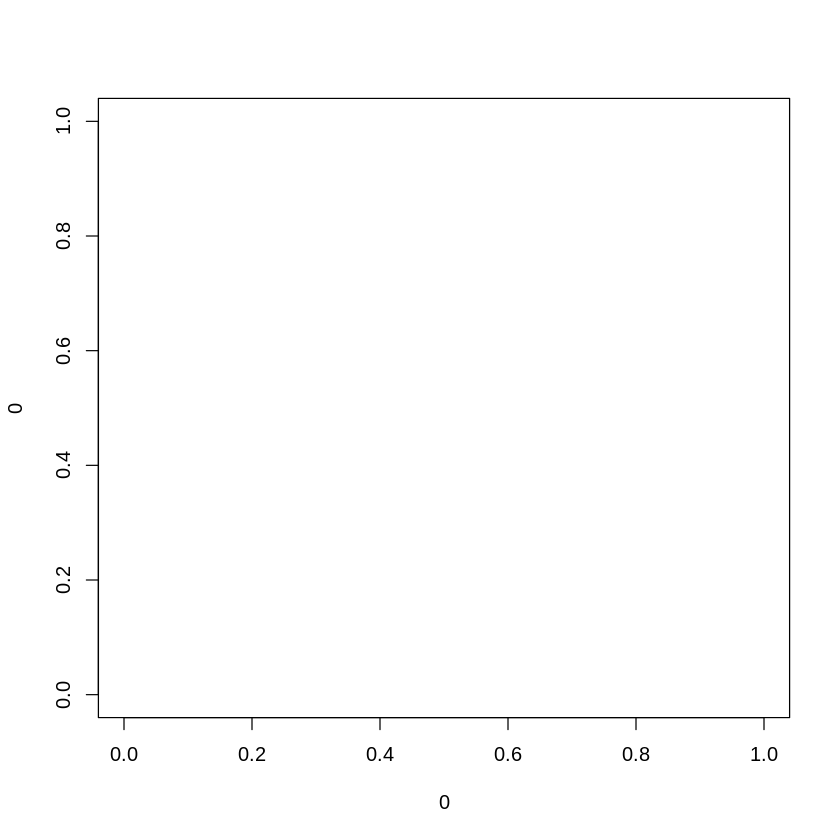

In [197]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")

cl <- rainbow(lam2_size)

m_fpr <- matrix(NA,replic_size, lam1_size)
m_tpr <- matrix(NA,replic_size, lam1_size)

for(s in 1:replic_size){


    ssjggl_fpr <- ssjggl_roc[[1]]$FPR[[s]]
    ssjggl_tpr <- ssjggl_roc[[1]]$TPR[[s]]

    fpr_sort <- sort(ssjggl_fpr)
    tpr_sort <- ssjggl_tpr[order(ssjggl_fpr)]

    #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
    m_fpr[s,] <- fpr_sort
    m_tpr[s,] <- tpr_sort

    d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
    d_tpr <- apply(m_tpr, 2, mean, trim=0.4)
    #colMeans(m_tpr, na.rm = FALSE, dims = 1)
    lines(d_fpr, d_tpr,type="l",col=cl[1])
}

best_ssjggl_fpr <- d_fpr
best_ssjggl_tpr <- d_tpr



In [58]:
tiff(paste("../../figures/scalefree_roc1.tiff",sep=""),width = 5, height=5, res=600, units = "in", pointsize = 12)

plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n",xlab="FPR", ylab="TPR")

cl <- rainbow(3)

lines(best_fgl_fpr, best_fgl_tpr,type="l", col=cl[1])
lines(best_ggl_fpr, best_ggl_tpr,type="l", col=cl[2])
lines(best_gl_fpr, best_gl_tpr,type="l", col=cl[3])
#lines(best_ssjggl_fpr, best_ssjggl_tpr,type="l", col=cl[4])
title(main="ROC Curve") 
legend(0.7,0.35, legend = c("FGL","GGL","GL"), col = cl, cex = 1, lwd = 2,lty=1)
#dev.copy(tiff,paste("../../figures/scalefree_roc1.tiff",sep=""),width = 5, height=5, res=600, units = "in", pointsize = 12)
dev.off()

png 
  2